# Project 3 - Part 4 - Hypothesis Testing
Author: Paul Foy

# Imports and Load Data

In [1]:
# Required Imports
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import os, time,json
from tqdm.notebook import tqdm_notebook
import tmdbsimple as tmdb 
import glob


import pymysql
pymysql.install_as_MySQLdb()

from urllib.parse import quote_plus as urlquote

# from sqlalchemy import create_engine
# from sqlalchemy_utils import create_database, database_exists

# Load Data

In [2]:
#Check data that exists in Data folder
FOLDER = 'Data/2010s/'
file_list = sorted(os.listdir(FOLDER))
file_list

['2010sfinal_tmdb_data_2010.csv.gz',
 '2010sfinal_tmdb_data_2011.csv.gz',
 '2010sfinal_tmdb_data_2012.csv.gz',
 'combined_tmdb_data.csv.gz']

In [3]:
#Use glob to find final_tmdb_data csv files
q = FOLDER+"2010sfinal_*csv.gz"
print(q)
file_list = sorted(glob.glob(q))
file_list

Data/2010s/2010sfinal_*csv.gz


['Data/2010s\\2010sfinal_tmdb_data_2010.csv.gz',
 'Data/2010s\\2010sfinal_tmdb_data_2011.csv.gz',
 'Data/2010s\\2010sfinal_tmdb_data_2012.csv.gz']

In [4]:
#Use list comprehension to load all files into 1 data frame
df = pd.concat([pd.read_csv(f, lineterminator = '\r') for f in file_list])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,\n0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\ntt0260305,0.0,/lTN9dbQNJjSIEROc74iUOnblhIn.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,101708.0,en,Putting It Together,...,0.0,105.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A musical review,Putting It Together,0.0,5.800,6.0,NR
2,\ntt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,NaN
3,\ntt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13
4,\ntt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.000,1.0,NaN


In [5]:
#Remove zero id
df = df.loc[df['imdb_id'] != '0']
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,\n0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\ntt0260305,0.0,/lTN9dbQNJjSIEROc74iUOnblhIn.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,101708.0,en,Putting It Together,...,0.0,105.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A musical review,Putting It Together,0.0,5.800,6.0,NR
2,\ntt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,NaN
3,\ntt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13
4,\ntt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.000,1.0,NaN


In [6]:
#Save data to disk 
df.to_csv(FOLDER+'combined_tmdb_data.csv.gz', compression = 'gzip', index = False)

# Load and Inspect Data

In [7]:
# Load new dataset and verify
df1 = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\r')
df1.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,"\n""\n0""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"\n""\ntt0260305""",0.0,/lTN9dbQNJjSIEROc74iUOnblhIn.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,101708.0,en,Putting It Together,...,0.0,105.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A musical review,Putting It Together,0.0,5.800,6.0,NR
2,"\n""\ntt0312305""",0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,NaN
3,"\n""\ntt0326965""",0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.318,33.0,PG-13
4,"\n""\ntt0331312""",0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.000,1.0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 3567
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                7485 non-null   object 
 1   adult                  7479 non-null   float64
 2   backdrop_path          4326 non-null   object 
 3   belongs_to_collection  568 non-null    object 
 4   budget                 7479 non-null   float64
 5   genres                 7479 non-null   object 
 6   homepage               1958 non-null   object 
 7   id                     7479 non-null   float64
 8   original_language      7479 non-null   object 
 9   original_title         7479 non-null   object 
 10  overview               7272 non-null   object 
 11  popularity             7479 non-null   float64
 12  poster_path            6600 non-null   object 
 13  production_companies   7479 non-null   object 
 14  production_countries   7479 non-null   object 
 15  rele

In [9]:
#Drop unneedeed columns for testing
drop_cols = ['adult', 'backdrop_path', 'belongs_to_collection', 'homepage', 
             'original_title', 'overview', 'poster_path', 'status', 'tagline', 
             'video', 'budget', 'genres', 'id', 'original_language', 
             'popularity', 'production_companies', 'production_countries', 
             'spoken_languages', 'title',]
df = df.drop(columns = drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 3567
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        7485 non-null   object 
 1   release_date   7365 non-null   object 
 2   revenue        7479 non-null   float64
 3   runtime        7479 non-null   float64
 4   vote_average   7479 non-null   float64
 5   vote_count     7479 non-null   float64
 6   certification  2078 non-null   object 
dtypes: float64(4), object(3)
memory usage: 467.8+ KB


In [10]:
#Preview certification column
df['certification'].value_counts(dropna = False)

NaN      5407
R         816
NR        513
PG-13     428
PG        215
G          86
NC-17      20
Name: certification, dtype: int64

In [11]:
#Clean up extra ratings
cert_dict = {'Unrated': 'NR',
            'UR': 'NR',
            'Not Rated': 'NR',
            'ScreamFest Horror Film Festival': 'NR'}

#Replace values
df['certification'] = df['certification'].replace(cert_dict)
df['certification'].value_counts(dropna = False)

NaN      5407
R         816
NR        513
PG-13     428
PG        215
G          86
NC-17      20
Name: certification, dtype: int64

In [12]:
#Drop null values
df = df.dropna(subset = 'certification')
df['certification'].value_counts()

R        816
NR       513
PG-13    428
PG       215
G         86
NC-17     20
Name: certification, dtype: int64

# Hypothesis Testing

## Hypothesis 1

**Business Question**: 
- Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

**State Hypothesese**: 
- H<sub>0</sub>: There is no difference between revenue generated for different ratings.
- H<sub>a</sub>: There is a significant difference between revenue generated for different ratings.

**Alpha** 
- 0.05

**Test type**:
- Because we are comparing a numeric value (revenue) across multiple groups (ratings), I will use an ANOVA test.

**Test Assumptions**: 
- No significant outliers.
- Normality.
- Equal Variance.

In [13]:
##Create groups dictionary
groups = {}
#Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['NR', 'PG-13', 'PG', 'R', 'G', 'NC-17'])

In [14]:
#Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T

#Checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
NR,513.0,4.718861e-248,1138.979071,True
PG-13,428.0,7.941967e-87,396.505484,True
PG,215.0,1.034547e-36,165.718200,True
R,816.0,2.444962e-186,854.773596,True
G,86.0,2.886346e-30,136.035123,True
NC-17,20.0,3.964616e-11,47.902054,True


Note: There are more than 15 samples in each group, so we can continue.

In [15]:
#Test for equal variance
stats.levene(*groups.values())

LeveneResult(statistic=29.152060934097257, pvalue=1.1166710071019755e-28)

### Run Test

In [16]:
#Execute Kruskal=Wallis test
result = stats.kruskal(*groups)
print(result)
print(result.pvalue < .05)

KruskalResult(statistic=5.0, pvalue=0.4158801869955079)
False


C:\Users\pafoy_gz6qkdd\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


### Results
- Our p-value is ***greater than*** our alpha of 0.05, therefore we fail to reject the null hypothesis. In our data, there is not a significant difference in average revenue generated per rating category.


### Supporting Visualization

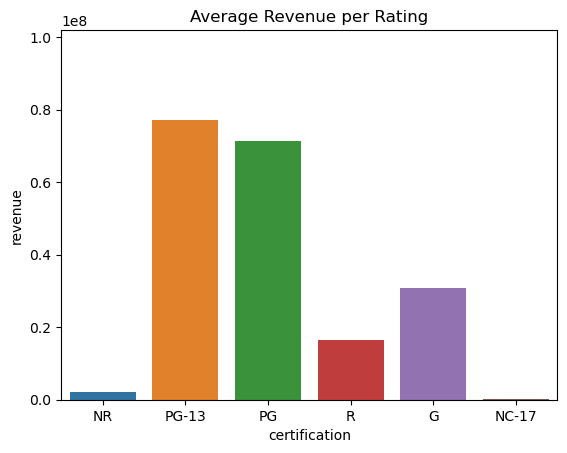

In [31]:
#Create barplot of revenue vs. rating
ax = sns.barplot(data = df, x= 'certification', y= 'revenue', errwidth=0)
ax.set_title('Average Revenue per Rating');

## Hypothesis Test 2: 
- Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?

**State Hypothesese**: 
- H<sub>0</sub>: There is no difference between groups of movies.
- H<sub>a</sub>: There is a significant difference between groups of movies.

**Alpha** 
- 0.05

**Test type**:
- We are comparing a numeric outcome (revenue) to another numeric variable (runtime), so I will use a 2-sample t-test.



### Data Preprocessing

In [18]:
# Add new columsn for short and long movies
df['is_long'] = df['runtime'] > 150
df['is_short'] = df['runtime'] <= 90
df.head()

,imdb_id,release_date,revenue,runtime,vote_average,vote_count,certification,is_long,is_short
1,\ntt0260305,2001-10-14,0.0,105.0,5.800,6.0,NR,False,False
3,\ntt0326965,2010-04-23,0.0,90.0,5.318,33.0,PG-13,False,True
6,\ntt0398286,2010-11-24,592461732.0,100.0,7.598,10510.0,PG,False,False
8,\ntt0411951,2010-03-20,967000.0,92.0,5.377,624.0,R,False,False
9,\ntt0419692,2010-08-06,0.0,112.0,5.889,9.0,NR,False,False


In [19]:
# Create groups to test for long (>150 min) and short (<150 min)
long = df.loc[df['is_long'] == True, ['revenue', 'is_long']]
short = df.loc[df['is_short'] == True, ['revenue', 'is_short']]
print(f'There are {len(long)} movies over 2.5 hours.')
print(f'There are {len(short)} movies under 1.5 hours.')

There are 15 movies over 2.5 hours.
There are 840 movies under 1.5 hours.


In [20]:
#Create new datasets
long_group = long['revenue']
short_group = short['revenue']
display(long_group.head(), short_group.head())

275    2.700000e+06
288    4.234536e+07
232    1.123794e+09
373    0.000000e+00
527    0.000000e+00
Name: revenue, dtype: float64

3            0.0
24    83188165.0
25           0.0
41           0.0
45           0.0
Name: revenue, dtype: float64

## Test Assumptions

- No significant outliers
- Normality
- Equal variance

In [21]:
# Check for sig. outliers in long group
zscores_long = stats.zscore(long_group)
outliers_long = abs(zscores_long)>3
np.sum(outliers_long)

0

In [22]:
# Remove outliers
long_group = long_group[(np.abs(stats.zscore(long_group)) < 3)]

In [23]:
#Check for sig. outliers in short group
zscores_short = stats.zscore(short_group)
outliers_short = abs(zscores_short)>3
np.sum(outliers_short)

8

In [24]:
#Remove outliers
short_group = short_group[(np.abs(stats.zscore(short_group)) < 3)]

In [25]:
#Normal Test for long group
result_long = stats.normaltest(long_group)
result_long

C:\Users\pafoy_gz6qkdd\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=4.3585114873130015, pvalue=0.11312569383231767)

In [26]:
#Normal Test of short group
result_short = stats.normaltest(short_group)
result_short

NormaltestResult(statistic=1050.7250098796528, pvalue=6.88593796357394e-229)

In [27]:
#Test for equal variance
result = stats.levene(long_group, short_group)
result

LeveneResult(statistic=585.4709840208482, pvalue=1.0931828654559278e-98)

Note: 
- Failed equal variance test. 
- As a result, we'll need to use a Welch's T-test with the equal_var = False parameter

### Run test

In [28]:
result = stats.ttest_ind(long_group, short_group, equal_var = False)
result

Ttest_indResult(statistic=3.0204788984040984, pvalue=0.009171198071895736)

The p-value from the t-test is less than 0.05. We can reject the null hypothesis. There is a significant difference between the revenue generated by short movies vs. long movies.

### Visualization

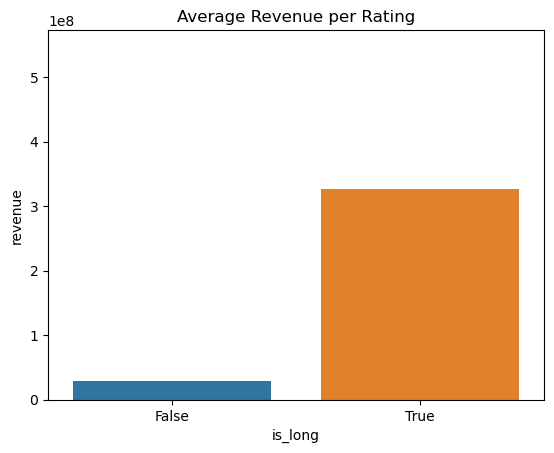

In [30]:
#Create barplot 
ax = sns.barplot(data = df, x= 'is_long', y= 'revenue', errwidth=0)
ax.set_title('Average Revenue per Rating');